# **IMPORT STATEMENTS**

In [1]:
#IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv")

In [3]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5078336 entries, 0 to 5078344
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   From Bank           int64  
 1   Account             object 
 2   To Bank             int64  
 3   Account.1           object 
 4   Amount Received     float64
 5   Receiving Currency  object 
 6   Amount Paid         float64
 7   Payment Currency    object 
 8   Payment Format      object 
 9   Is Laundering       int64  
 10  Date                object 
 11  Day                 object 
 12  Time                object 
dtypes: float64(2), int64(3), object(8)
memory usage: 542.4+ MB


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
# Convert the "Timestamp" column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract Date, Day, and Time from the Timestamp
df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time                                              

df.drop(columns=["Timestamp"], inplace=True)

In [6]:
df.head()

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Day,Time
0,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:20:00
1,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,2022-09-01,Thursday,00:20:00
2,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:00:00
3,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:02:00
4,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:06:00


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['Is Laundering'],axis = 1)
y = df['Is Laundering']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [11]:
ohe = Pipeline([('Encoder',OneHotEncoder(drop = 'first',handle_unknown='ignore'))])

In [12]:
categorical = ['From Bank','Account','To Bank','Receiving Currency','Payment Currency','Payment Format','Day']

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
transformer = ColumnTransformer([('One Hot Encoding',ohe,categorical)])

In [16]:
model = Pipeline([("Transformer",transformer),
                 ("Estimator",XGBClassifier())])

In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('One Hot Encoding',
                                                  Pipeline(steps=[('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['From Bank', 'Account',
                                                   'To Bank',
                                                   'Receiving Currency',
                                                   'Payment Currency',
                                                   'Payment Format',
                                                   'Day'])])),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [18]:
#Predictions
y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Confusion Matrix:
[[1521876       3]
 [   1528      94]]


<Axes: >

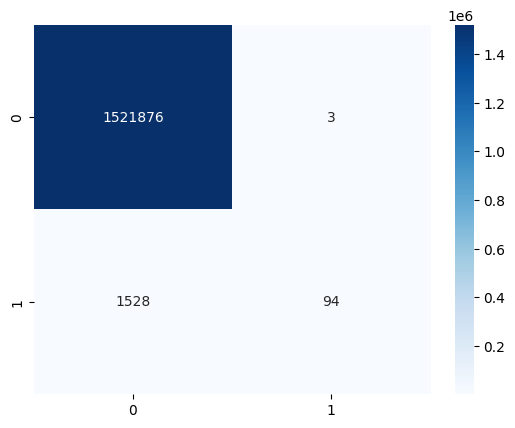

In [27]:
#Evaluation
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [21]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1521879
           1       0.97      0.06      0.11      1622

    accuracy                           1.00   1523501
   macro avg       0.98      0.53      0.55   1523501
weighted avg       1.00      1.00      1.00   1523501



In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100)
print("Precision Score:",precision_score(y_test, y_pred)*100)
print("Recall Score:",recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy Score: 99.89950777846552
Precision Score: 96.90721649484536
Recall Score: 5.7953144266337855
F1 Score: 10.936591041303084
